In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
data = pd.read_csv('Ecommerce_data.csv')
today = datetime(2024,12,19)
print(data.head(10))

#read data into a DF from csv

      CID         TID  Gender     Age Group        Purchase Date  \
0  943146  5876328741  Female         25-45  30/08/2023 20:27:08   
1  180079  1018503182    Male         25-45  23/02/2024 09:33:46   
2  337580  3814082218   Other  60 and above  06/03/2022 09:09:50   
3  180333  1395204173   Other  60 and above  04/11/2020 04:41:57   
4  447553  8009390577    Male         18-25  31/05/2022 17:00:32   
5  200614  3994452858    Male         18-25  12/07/2021 15:10:27   
6  668787  9460023916    Male         25-45  08/10/2023 16:59:52   
7  933551  6877673032  Female         18-25  14/12/2022 20:13:45   
8  414167  2841266620    Male         18-25  29/04/2020 09:10:46   
9  889269  1342270638   Other  60 and above  18/12/2023 19:04:02   

   Product Category Discount Availed    Discount Name  Discount Amount (INR)  \
0       Electronics              Yes        FESTIVE50                  64.30   
1       Electronics              Yes  SEASONALOFFER21                 175.19   
2          

In [ ]:
data['Purchase Date'] =  pd.to_datetime(data['Purchase Date'], dayfirst = True)

#converted date column into datetime object

In [ ]:
rfm = data.groupby('CID').agg({
    'Purchase Date':lambda x : (today - x.max()).days,
    'TID': 'count',
    'Gross Amount': 'sum'
}).reset_index()

rfm.columns = ['Customer_ID','Recency','Frequency','Monetary']
print(rfm)

# created a group object based on customer ID, then found the RFM columns 
# Recency = how long since last purchase
# Frequency = how many total orders
# Monetary = total amount of revenue

       Customer_ID  Recency  Frequency     Monetary
0           100009      378          1   6654.27840
1           100037      967          1   3573.14200
2           100063     1720          1    522.90000
3           100089      353          4  12672.73200
4           100096      110          1   4320.67500
...            ...      ...        ...          ...
29066       999876      505          1   4372.10400
29067       999883     1275          2   3065.24515
29068       999910     1550          1   2646.50715
29069       999924     1584          1   2802.35550
29070       999996     1462          2   4745.01300

[29071 rows x 4 columns]


In [ ]:
n_bins = len(pd.qcut(rfm['Frequency'], 4, duplicates='drop', retbins=True)[1]) - 1

labels = list(range(1, n_bins + 1))  
rfm['recency_score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])
rfm['frequency_score'] = pd.qcut(rfm['Frequency'], 4, labels=labels, duplicates='drop')
rfm['monetary_score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])

# Translated RFM values into relative RFM scores by splitting them into bins based on values

In [ ]:
rfm['rfm_score'] = rfm['recency_score'].astype(int) + rfm['frequency_score'].astype(int) + rfm['monetary_score'].astype(int)

# We calculated a TOTAL score for each customer by adding their respective RFM scores



In [ ]:
def segment_customer(score):
    if score >= 9:
        return 'Loyal'
    elif 7 <= score < 9:
        return 'Potential Loyalist'
    elif 4 <= score < 7:
        return 'At Risk'
    else:
        return 'Lost'

rfm['segment'] = rfm['rfm_score'].apply(segment_customer)

print(rfm.head(50))

#We segment customers into groups based on their TOTAL RFM Score

    Customer_ID  Recency  Frequency      Monetary recency_score  \
0        100009      378          1   6654.278400             3   
1        100037      967          1   3573.142000             2   
2        100063     1720          1    522.900000             1   
3        100089      353          4  12672.732000             4   
4        100096      110          1   4320.675000             4   
5        100097      261          2   7057.091200             4   
6        100139      698          1   3283.254000             2   
7        100177     1292          1   4785.818400             1   
8        100193     1392          2   4030.375850             1   
9        100205      792          4   8196.057825             2   
10       100258      189          3   9107.267900             4   
11       100301      419          1   4258.676400             3   
12       100359      290          3   8543.203625             4   
13       100370     1289          1    164.181600             

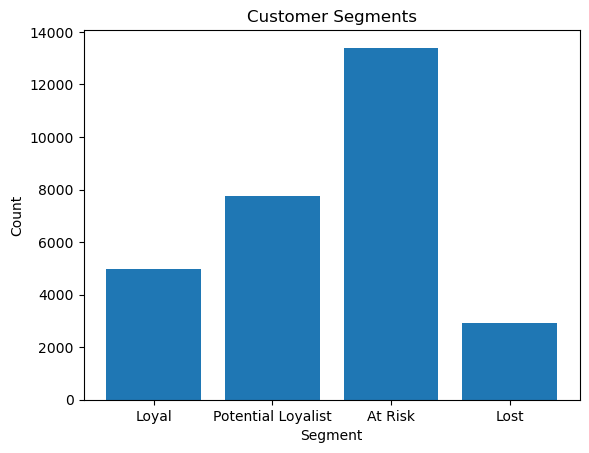

In [ ]:
#now to graph 

counts = rfm['segment'].value_counts()

order = ['Loyal', 'Potential Loyalist', 'At Risk', 'Lost']

plt.bar(order, counts[order])  

# Ensured counts are plotted in the specified order

plt.title('Customer Segments')
plt.xlabel('Segment')
plt.ylabel('Count')


plt.show()


In [ ]:
print(rfm['segment'].head(50))

0     Potential Loyalist
1                At Risk
2                   Lost
3                  Loyal
4     Potential Loyalist
5     Potential Loyalist
6                At Risk
7                At Risk
8                At Risk
9     Potential Loyalist
10                 Loyal
11               At Risk
12                 Loyal
13                  Lost
14               At Risk
15               At Risk
16               At Risk
17    Potential Loyalist
18               At Risk
19                 Loyal
20                  Lost
21               At Risk
22    Potential Loyalist
23               At Risk
24               At Risk
25                  Lost
26               At Risk
27               At Risk
28               At Risk
29               At Risk
30               At Risk
31               At Risk
32    Potential Loyalist
33               At Risk
34               At Risk
35    Potential Loyalist
36                  Lost
37    Potential Loyalist
38    Potential Loyalist
39    Potential Loyalist
